<a href="https://colab.research.google.com/github/Luseat/clustering_mall_customer/blob/main/Clustering_Mall_Cutomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/Luseat/clustering_mall_customer/refs/heads/main/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


1. **CustomerID:** Ini berisi ID unik untuk setiap pelanggan, bertipe data int64.
2. **Gender:** Ini menunjukkan jenis kelamin pelanggan, bertipe data object (kategori).
3. **Age:** Ini menampilkan usia pelanggan dalam tahun, bertipe data int64.
4. **Annual Income (k$):** Ini berisi pendapatan tahunan pelanggan dalam ribuan dolar, bertipe data int64.
5. **Spending Score (1-100):** Ini menunjukkan skor pengeluaran pelanggan, mulai dari 1 hingga 100, bertipe data int64.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Menhitung distribusi dan menampilkan pie cart

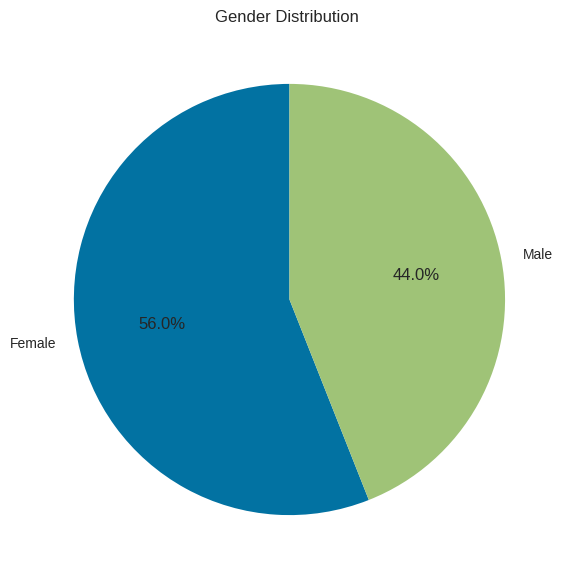

In [13]:
plt.figure(figsize=(7, 7))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%', startangle = 90)
plt.title('Gender Distribution ')
plt.show()

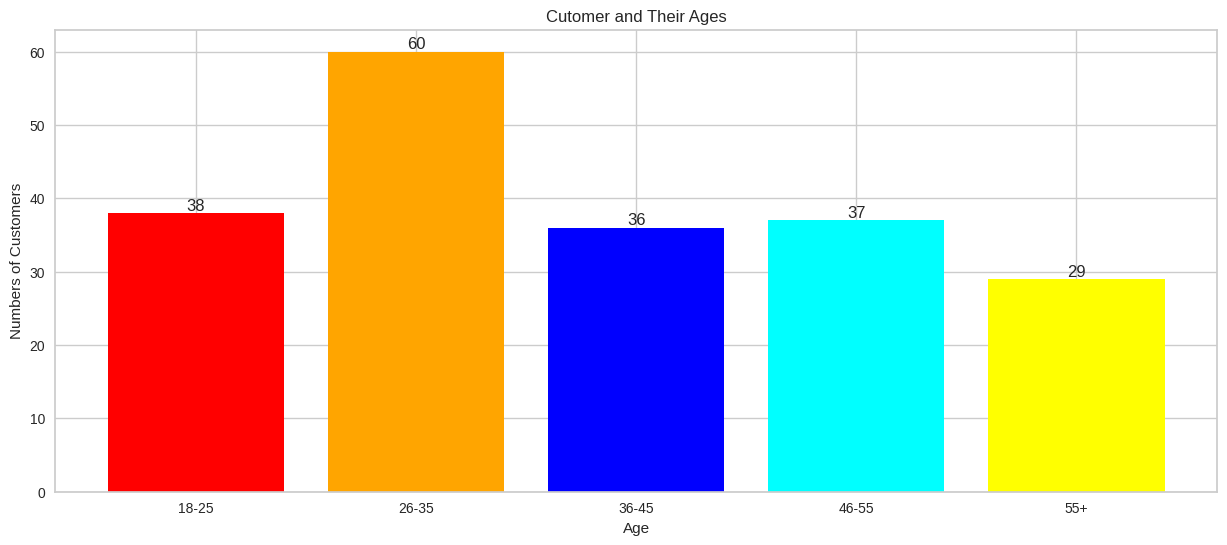

In [19]:
# # Mengelompokkan usia ke dalam kategori
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above =  df.Age[df.Age >= 56]


# Menyusun data untuk plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]
# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15,6))
plt.bar(x, y, color = ['red', 'orange', 'blue', 'cyan', 'yellow'])
plt.title("Cutomer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Numbers of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range (len(x)):
    plt.text(i, y[i], y[i], ha = 'center', va = 'bottom')
plt.show()

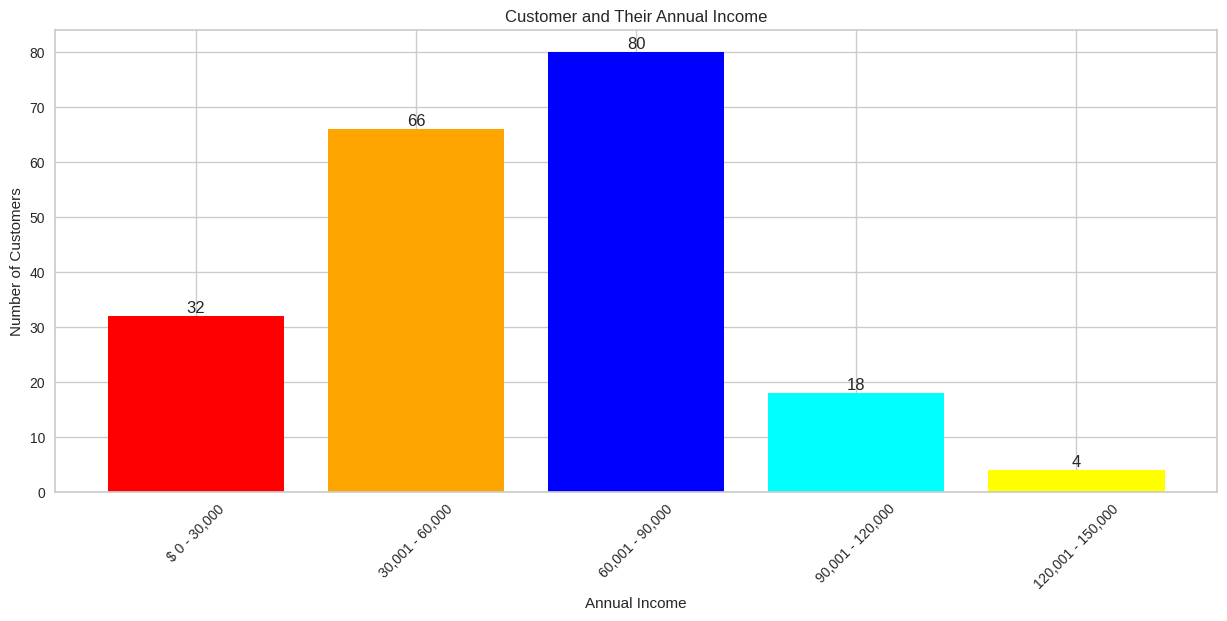

In [20]:
# Mengelompokkan pendapatan tahunan pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]


# Menyusun data untuk plotting
aix = ["$ 0 - 30,000", "30,001 - 60,000", "60,001 - 90,000", "90,001 - 120,000", "120,001 - 150,000" ]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

# Membuat bar chart untuk distribusi pendapatan tahunan pelanggan
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color = ['red', 'orange', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Number of Customers")
plt.xticks(rotation = 45) # Memutar label sumbu x agar lebih mudah dibaca

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range (len(aix)):
  plt.text(i, aiy[i], aiy[i], ha = 'center', va = 'bottom')

plt.show()